# Hand-Designing Filters

Convolutional layer, which is the most important building block of CNN, actively utilizes the concept of filters used in traditional image processing. Therefore, it is quite important to know and understand the types and operation of image filters. In this notebook, we will design convolution filters by hand to understand the operation of convolution.

In [1]:
# As usual, a bit of setup

import time
import numpy as np
import matplotlib.pyplot as plt
import requests
import random 
import torch
from PIL import Image
from scipy import ndimage


seed = 7
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
# comment out the lines below if using Python version >= 3.12 (but you will need to manually rerun cells)
%load_ext autoreload
%autoreload 2

imagenet_mean = np.array([0.485, 0.456, 0.406])
imagenet_std = np.array([0.229, 0.224, 0.225])

def show_image(image, title=''):
    # image is [H, W, 3]
    # assert image.shape[2] == 3
    image = torch.tensor(image)
    plt.imshow(torch.clip((image) * 255, 0, 255).int())
    plt.title(title, fontsize=16)
    plt.axis('off')
    return

def show_multiple_images(images=[], titles=[]):
    assert len(images) == len(titles), "length of two inputs are not equal"
    N = len(images)
    # make the plt figure larger
    plt.rcParams['figure.figsize'] = [24, 24]

    for i in range(N):
        plt.subplot(1, N, i+1)
        show_image(images[i], titles[i])

    plt.show()

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

## Designing Filters

In this problem, you will design simple blurring and edge detection filters. 

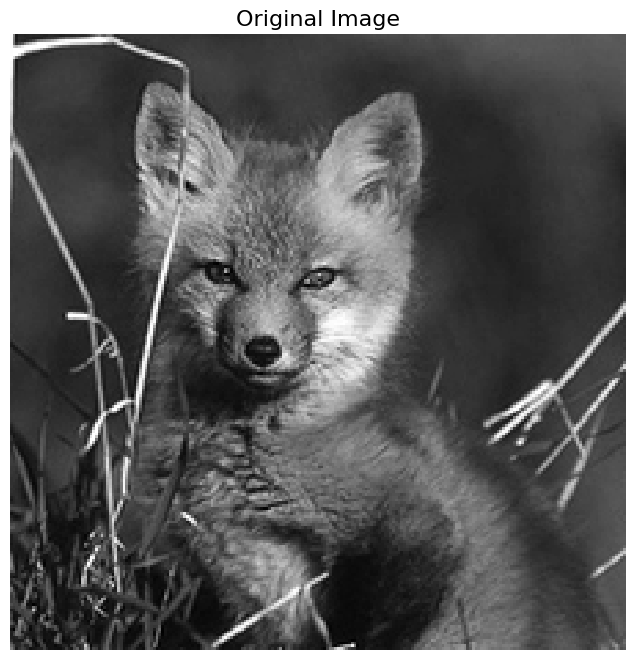

In [2]:
img_url = 'https://user-images.githubusercontent.com/11435359/147738734-196fd92f-9260-48d5-ba7e-bf103d29364d.jpg' # fox, from ILSVRC2012_val_00046145

img = Image.open(requests.get(img_url, stream=True).raw)
img = np.array(img) / 255
gray_img = rgb2gray(img)


show_image(gray_img, 'Original Image')

### Image Blurring

Image blurring also called image smoothing, usually refers to making an image fuzzy. This filtering is typically used to remove noise in the image. There are various types of image blurring filters, but the three most common are Averaging, Gaussian blurring, and Median filtering.

We will implement Averaging filtering in this project. Averaging filtering is also called moving averaging in 1-D. This filter works by placing a mask over an image and then taking the average of all the image pixels covered by the mask and replacing the central pixel with that value.

If the kernel size of the image filter is $n \times n$, then the size of each element in the kernel matrix is $\frac{1}{n^2}$. Also, the sum of all the elements in the kernel matrix will be 1. So, if the kernel size is $3 \times 3$, kernel will be as follows.

$ 
    \frac{1}{9} \times \left[
    \begin{array}{ccc}
    1 & 1 & 1 \\
    1 & 1 & 1 \\
    1 & 1 & 1 \\
    \end{array}
    \right]
$

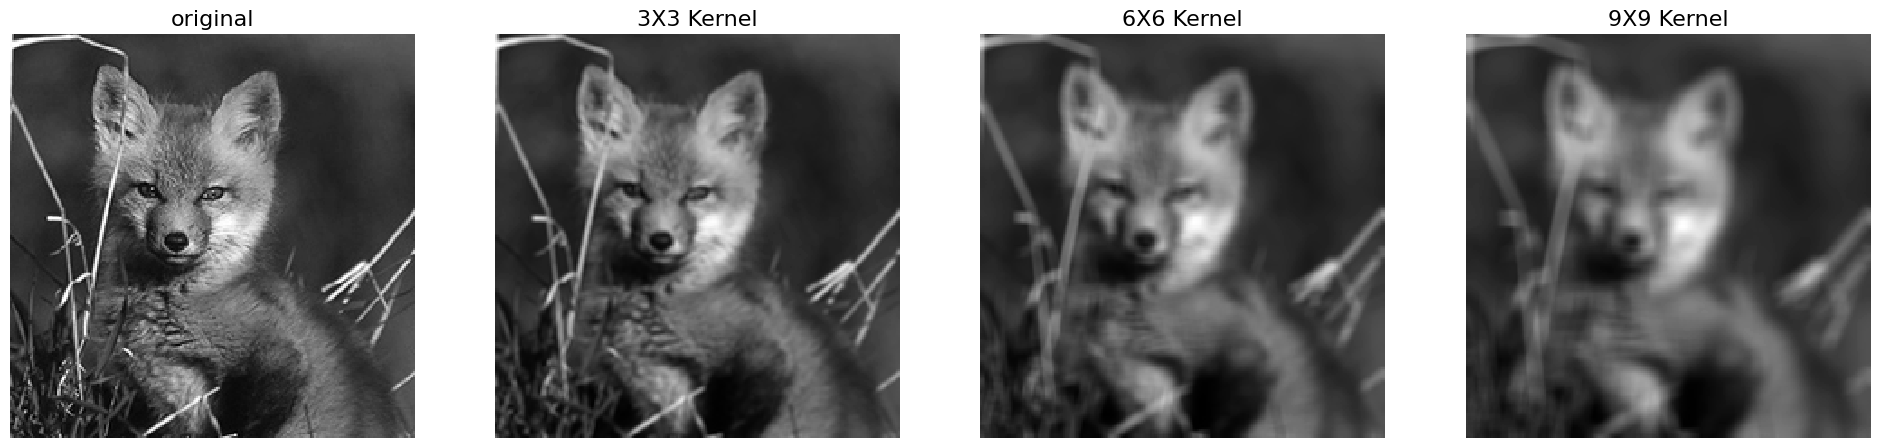

In [3]:
def averaging_filtering(image, filter_size=3):
    #############################################################################
    # TODO: Implement the averaging filter with the given filter size.          #
    # Hint: You can use np.ones                                                 #
    #############################################################################
    kernel = np.ones((filter_size, filter_size)) / (filter_size**2)
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    output = ndimage.convolve(image, kernel)
    return output

avg_images, avg_titles = [gray_img], ['original']
for kernel_size in [3, 6, 9]:
    averaging_image = averaging_filtering(gray_img, kernel_size)
    avg_images.append(averaging_image)
    avg_titles.append(f'{kernel_size}X{kernel_size} Kernel')

show_multiple_images(avg_images, avg_titles)

### Edge Detection

Next, we will implement a simple edge detection filter. Edge detection is an algorithm that detects edges in an image. An edge in an image is a place where the brightness of the image changes abruptly or discontinuously. Several edge detection algorithms exist, such as the Canny edge detector, the Sobel filter and the Laplacian derivatives filter. 

Here, we will use the $3\times 3$ Laplacian kernel. This kernel, when convolved with the image, computes the $3\times 3$ discrete Laplacian of the image:

$ 
    \left[
    \begin{array}{ccc}
    0 & 1 & 0 \\
    1 & -4 & 1 \\
    0 & 1 & 0 \\
    \end{array}
    \right]
$

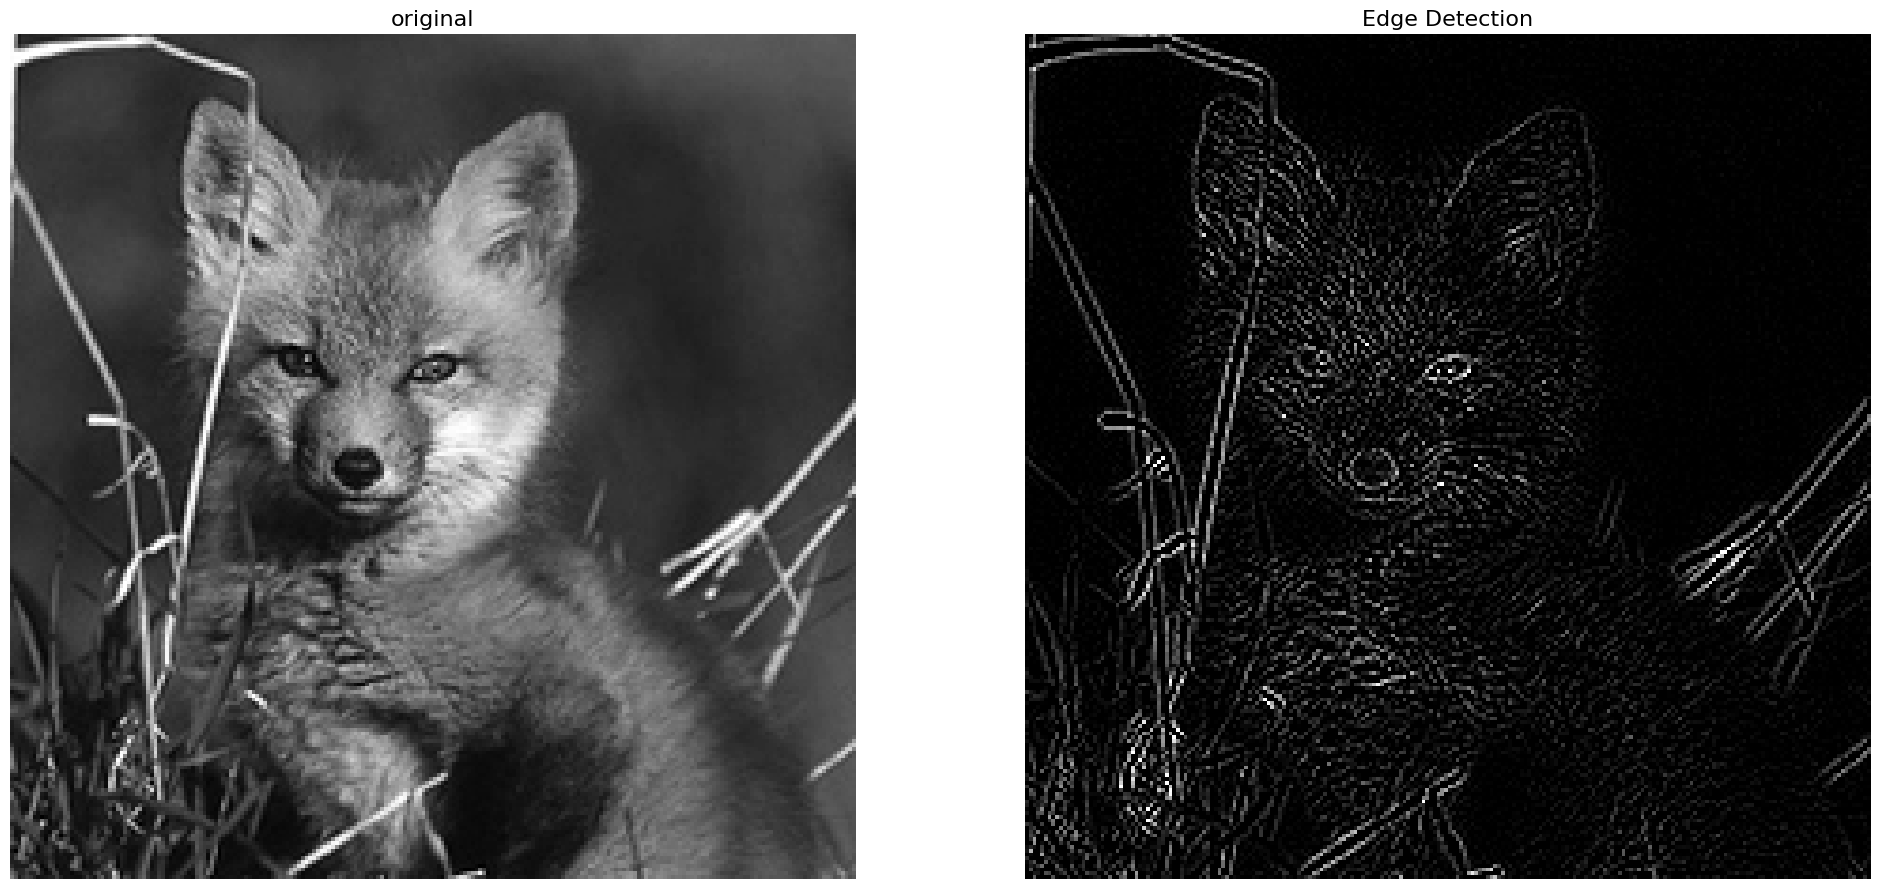

In [4]:
def edge_detecting(image):
    #############################################################################
    # TODO: Implement the Laplacian derivative filter.                          #
    #############################################################################
    kernel = np.array([
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]
    ])
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    output = ndimage.convolve(image, kernel)
    return output

edge_images, edge_titles = [gray_img], ['original']
edge_image = edge_detecting(gray_img)
edge_images.append(edge_image)
edge_titles.append(f'Edge Detection')

show_multiple_images(edge_images, edge_titles)